In [51]:
import numpy as np
import pandas as pd
import pylab
from qiskit import BasicAer
from qiskit.aqua import aqua_globals, QuantumInstance
from qiskit.aqua.algorithms import NumPyMinimumEigensolver, VQE
from qiskit.aqua.components.optimizers import SLSQP
from qiskit.chemistry.components.initial_states import HartreeFock #initial ansatz
from qiskit.chemistry.components.variational_forms import UCCSD #convert guess to ansatz
from qiskit.chemistry.drivers import PySCFDriver
from qiskit.chemistry.core import Hamiltonian, QubitMappingType

In [52]:
molecule = 'H .0 .0 -{0}; Li .0 .0 {0}'
distances = np.arange(0.25, 10.25, 0.25)
vqe_energies = []
hf_energies = []
exact_energies = []

In [53]:
for i,d in enumerate(distances):
    print('step', i)
    
    #set up experiment
    driver = PySCFDriver(molecule.format(d/2), basis = 'sto3g')
    qmolecule = driver.run()
    operator = Hamiltonian(qubit_mapping = QubitMappingType.PARITY, 
                          two_qubit_reduction = True, freeze_core = True, 
                          orbital_reduction = [-3, -2])
    qubit_op, aux_ops = operator.run(qmolecule)
    
    #exact result classical
    exact_result = NumPyMinimumEigensolver(qubit_op, aux_operators = aux_ops).run()
    exact_result = operator.process_algorithm_result(exact_result)
    
    #VQE
    optimizer = SLSQP(maxiter=1000)
    initial_state = HartreeFock(operator.molecule_info['num_orbitals'], 
                               operator.molecule_info['num_particles'],
                               qubit_mapping = operator._qubit_mapping,
                               two_qubit_reduction = operator._two_qubit_reduction)
    var_form = UCCSD(num_orbitals = operator.molecule_info['num_orbitals'],
                    num_particles = operator.molecule_info['num_particles'],
                    initial_state = initial_state,
                    qubit_mapping = operator._qubit_mapping,
                    two_qubit_reduction = operator._two_qubit_reduction)
    algo=VQE(qubit_op, var_form, optimizer, aux_operators = aux_ops)
    
    vqe_result = algo.run(QuantumInstance(BasicAer.get_backend('statevector_simulator')))
    vqe_result = operator.process_algorithm_result(vqe_result)
    
    exact_energies.append(exact_result.energy)
    vqe_energies.append(vqe_result.energy)
    hf_energies.append(vqe_result.hartree_fock_energy)

step 0


/var/folders/xb/s1j3dd056s1g5hjpry115bs40000gn/T/ipykernel_64673/857847501.py:7: DeprecationWarning: The Hamiltonian class is deprecated as of Qiskit Aqua 0.8.0 and will be removed no earlier than 3 months after the release date. Instead, the FermionicTransformation can be used.
  operator = Hamiltonian(qubit_mapping = QubitMappingType.PARITY,


step 1
step 2
step 3
step 4
step 5
step 6
step 7
step 8
step 9
step 10
step 11
step 12
step 13
step 14
step 15
step 16
step 17
step 18
step 19
step 20
step 21
step 22
step 23
step 24
step 25
step 26
step 27
step 28
step 29
step 30
step 31
step 32
step 33
step 34
step 35
step 36
step 37
step 38
step 39


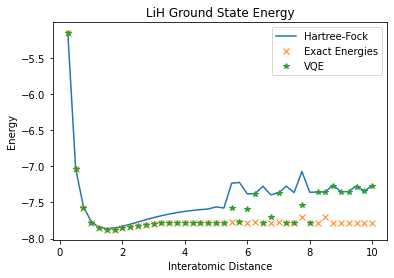

In [54]:
pylab.plot(distances, hf_energies, label = "Hartree-Fock")
pylab.plot(distances, exact_energies, 'x', label = "Exact Energies")
pylab.plot(distances, vqe_energies, '*', label = "VQE")


pylab.xlabel('Interatomic Distance')
pylab.ylabel('Energy')
pylab.title('LiH Ground State Energy')
pylab.legend(loc = 'upper right')

In [55]:
data = []
for i in range(len(vqe_energies)):
    data.append([distances[i], hf_energies[i], vqe_energies[i], exact_energies[i]])
pd.DataFrame(data, columns=["Distance", "Hartree-Fock Energy", "VQE Energy", "Exact Energy"])


,Distance,Hartree-Fock Energy,VQE Energy,Exact Energy
0,0.25,-5.148336,-5.164165,-5.164166
1,0.50,-7.028410,-7.039732,-7.039733
2,0.75,-7.556722,-7.571893,-7.571893
3,1.00,-7.767362,-7.782242,-7.782242
4,1.25,-7.844905,-7.860212,-7.860212
5,1.50,-7.863358,-7.881016,-7.881016
6,1.75,-7.853840,-7.876063,-7.876063
7,2.00,-7.830906,-7.860153,-7.860153
8,2.25,-7.801939,-7.841042,-7.841043
9,2.50,-7.770874,-7.823076,-7.823077


In [56]:
import pyscf

distances = np.arange(0.25, 10.25, 0.25)
hf_ccpVDZ_energies = []
cisd_ccpVDZ_energies = []
hf_sto3g_energies = []

for i,d in enumerate(distances):
    print('step', i)
    
    mol = pyscf.M(
    atom = 'H .0 .0 ,0; Li .0 .0 '+str(d),
    basis = 'ccpvdz')
    
    mf = mol.HF().run()
    mycc = mol.CISD().run()
    
    hf_ccpVDZ_energies.append(mf.e_tot)
    cisd_ccpVDZ_energies.append(mycc.e_tot)
    



step 0
converged SCF energy = -5.32899851108308
converged SCF energy = -5.32899851108308
E(RCISD) = -5.384924843072259  E_corr = -0.05592633198917833
step 1
converged SCF energy = -7.15955674837857
converged SCF energy = -7.15955674837857
E(RCISD) = -7.207812790634828  E_corr = -0.04825604225625689
step 2
converged SCF energy = -7.67711570659272
converged SCF energy = -7.67711570659272
E(RCISD) = -7.721156767955061  E_corr = -0.04404106136234378
step 3
converged SCF energy = -7.88136627942052
converged SCF energy = -7.88136627942052
E(RCISD) = -7.920862495862504  E_corr = -0.03949621644198525
step 4
converged SCF energy = -7.95841009152616
converged SCF energy = -7.95841009152616
E(RCISD) = -7.992290167738145  E_corr = -0.03388007621198168
step 5
converged SCF energy = -7.98176766435935
converged SCF energy = -7.98176766435935
E(RCISD) = -8.013091678344162  E_corr = -0.03132401398481596
step 6
converged SCF energy = -7.98192562140739
converged SCF energy = -7.98192562140739
E(RCISD) = 

In [57]:
data = []
for i in range(len(vqe_energies)):
    data.append([distances[i], hf_energies[i], hf_ccpVDZ_energies[i], cisd_ccpVDZ_energies[i], vqe_energies[i], exact_energies[i]])
pd.DataFrame(data, columns=["Distance", "HF-STO3G Energy", "HF-ccpVDZ Energy", "CISD-ccpVDZ Energy", "VQE Energy", "Exact Energy"])


,Distance,HF-STO3G Energy,HF-ccpVDZ Energy,CISD-ccpVDZ Energy,VQE Energy,Exact Energy
0,0.25,-5.148336,-5.328999,-5.384925,-5.164165,-5.164166
1,0.50,-7.028410,-7.159557,-7.207813,-7.039732,-7.039733
2,0.75,-7.556722,-7.677116,-7.721157,-7.571893,-7.571893
3,1.00,-7.767362,-7.881366,-7.920862,-7.782242,-7.782242
4,1.25,-7.844905,-7.958410,-7.992290,-7.860212,-7.860212
5,1.50,-7.863358,-7.981768,-8.013092,-7.881016,-7.881016
6,1.75,-7.853840,-7.981926,-8.013035,-7.876063,-7.876063
7,2.00,-7.830906,-7.972052,-8.003815,-7.860153,-7.860153
8,2.25,-7.801939,-7.958139,-7.991241,-7.841042,-7.841043
9,2.50,-7.770874,-7.943017,-7.978219,-7.823076,-7.823077


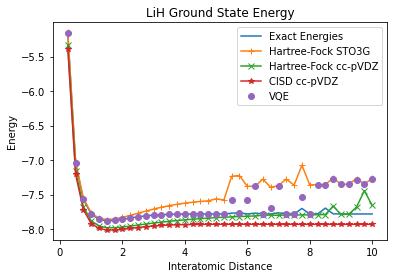

In [58]:
pylab.plot(distances, exact_energies, '-', label = "Exact Energies")
pylab.plot(distances, hf_energies, '-+', label = "Hartree-Fock STO3G")
pylab.plot(distances, hf_ccpVDZ_energies, '-x', label = "Hartree-Fock cc-pVDZ")
pylab.plot(distances, cisd_ccpVDZ_energies, '-*', label = "CISD cc-pVDZ")
pylab.plot(distances, vqe_energies, 'o', label = "VQE")


pylab.xlabel('Interatomic Distance')
pylab.ylabel('Energy')
pylab.title('LiH Ground State Energy')
pylab.legend(loc = 'upper right')